# Hello!
### This project takes YouTube videos and displays the clusters of comments. This is done by taking the video's comments and running them through a k-means clustering algorithm. The clusters are then displayed in a graph, with each cluster being a different color.

In [4]:
import pandas as pd
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# First, we will import our needed libraries. Pandas is for data manipulation, time is for timing our code, and selenium is for web scraping.
### We will also be using the Chrome web driver, which allows us to control a Chrome browser from Python.

In [5]:
data=[]
def commentscrap(url):
    with Chrome() as driver:
        wait = WebDriverWait(driver,10) #selenium will wait for a max of 10 seconds
        driver.get(url) #accessing the URL you want with the driver.get function

        for item in range(10): #higher range = more content
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) #scrolling down and wait until everything is visible with wait.until and EC.visibility_of_element_located.
            time.sleep(5)

        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))): #locating the comments section
            print(data.append(comment.text)) #appends comments to data list

# Next, we will define our commentscrap function. This function will take in a URL and scrape the comments from that URL.
### We will use Selenium to scroll down the page and load more comments, and then we will use Pandas to store those comments in a list.

In [6]:
url='https://www.youtube.com/watch?v=q0hyYWKXF0Q' #video of choice
commentscrap(url);

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


# For this project, we decided to go for a video that might be deemed controversial, and one that would spew many opinions from commenters
### The video in question is "TONES AND I - DANCE MONKEY (OFFICIAL VIDEO)" uploaded by Tones And I, the music video for her chart-topping song.


In [7]:
df = pd.DataFrame(data, columns=['comment'])
df
    

,comment
0,Amo esse clipe.
1,Love this song when I start my workouts specia...
2,This song never gets old
3,I realized the message is diff but I find joy ...
4,"Out of all of the songs ever made, this is def..."
...,...
695,Whenever I feel like shit I remember that peop...
696,This sounds like minnie mouse on helium with a...
697,This song never get old. No matter how much I ...
698,The soul purpose i will never travel to new ze...


# Here, we're using Pandas to create a DataFrame from our list of comments. 
### This DataFrame will be used in our next step, which is to cluster the comments.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer #used to convert text to vectors
from sklearn.decomposition import PCA
vectorizer = CountVectorizer()
x_vectorize=vectorizer.fit_transform(df.comment).toarray() #to turn the sentences to numbers
x_vectorize.shape
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_vectorize) #reducing the dimentionality to 2
df['x']=x_pca[:,0]
df['y']=x_pca[:,1]


# In this step, we will use Scikit-Learn to convert our comments into vectors. We will then use PCA to reduce the dimensionality of our vectors.
### This is done so that our data is more manageable and we can more easily visualize it. We will store the x and y coordinates of our vectors in our DataFrame.

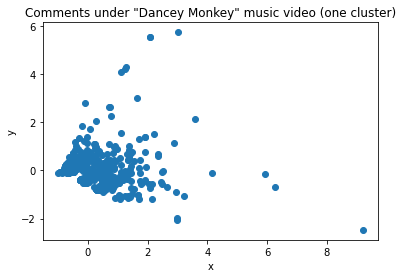

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.title('Comments under "Dancey Monkey" music video (one cluster)')
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_pca[:,0],x_pca[:,1]);

# Here, we are visualizing our data using Matplotlib. We can see that our data is clustered fairly well along -1 and 1 on the x-axis. 
### This shows that these comments are similar in nature, with a few outliers (those comments that are far from the cluster/dissimilar to the rest).

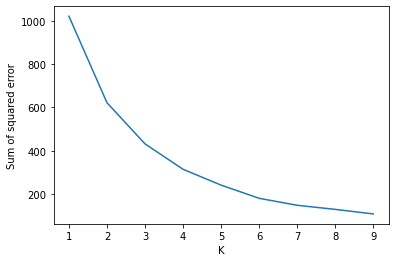

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# In this step, we are finding the optimal number of clusters using the elbow method.
### We can see that the elbow is at k=4, which means that 4 clusters is the optimal number for our data.

In [11]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 3, 1, 1, 0, 1,

# Here, we are using KMeans to cluster our data. We can see that our data has been clustered into 4 groups.

In [12]:
df['cluster']=y_predicted
df.head()

,comment,x,y,cluster
0,Amo esse clipe.,-0.756740,-0.065154,1
1,Love this song when I start my workouts specia...,1.239888,-0.142527,0
2,This song never gets old,0.320810,-0.817387,0
3,I realized the message is diff but I find joy ...,0.455626,-0.177389,0
4,"Out of all of the songs ever made, this is def...",2.515389,-0.036644,0


In [13]:
km.cluster_centers_

array([[ 0.86852215, -0.33028529],
       [-0.52839918,  0.04740832],
       [ 1.58841673,  2.9125966 ],
       [ 4.7083671 , -1.18003138]])

# These are the coordinates of the center of each cluster.
### Now, we will visualize our clusters, with each cluster being a different color.


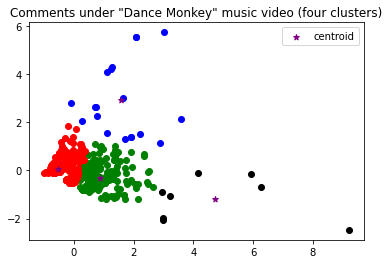

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='red')
plt.scatter(df3.x,df3.y,color='blue')
plt.scatter(df4.x,df4.y,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.style.use('fast')
plt.title('Comments under "Dance Monkey" music video (four clusters)')
plt.legend();

# We can see that our data has been clustered fairly well. The clusters barely overlap with one another, and they are all fairly compact (with the exception of our red & blue cluster, which are spread thinly over the x and y axis).
### There are also a few outliers, which are points that are far from the cluster centroids (again, mainly a part of the red/blue cluster).

In [15]:
df[df['cluster']==0]

,comment,x,y,cluster
1,Love this song when I start my workouts specia...,1.239888,-0.142527,0
2,This song never gets old,0.320810,-0.817387,0
3,I realized the message is diff but I find joy ...,0.455626,-0.177389,0
4,"Out of all of the songs ever made, this is def...",2.515389,-0.036644,0
5,8 years later and this song still hits differe...,0.586796,-0.576421,0
...,...,...,...,...
693,I think the video would be good for something ...,1.409293,0.702568,0
695,Whenever I feel like shit I remember that peop...,0.578288,-0.822759,0
697,This song never get old. No matter how much I ...,0.522489,-0.902653,0
698,The soul purpose i will never travel to new ze...,0.949707,-0.480570,0


# The above comments are in our green cluster.
### We can see that these comments are mostly neutral to positive, and include those in different languages (Portuguese, Spanish, German, etc.)

In [16]:
df[df['cluster']==1]

,comment,x,y,cluster
0,Amo esse clipe.,-0.756740,-0.065154,1
6,"0%Swearing\n0%Drugs\n0%Naked women,\n100% Gran...",-0.742207,-0.054605,1
8,Easily one of the greatest kids songs,-0.098939,0.373321,1
9,I like it,-0.486667,-0.067315,1
10,"La vidéo est très bien faite ,j'adore",-0.785691,-0.067338,1
...,...,...,...,...
682,Ablamın hastayken en çok dinlediği ve dinlerke...,-0.815804,-0.079388,1
683,Gerai,-0.729959,-0.062231,1
684,"i googled ""dance for me dance for me dance for...",-0.197794,1.862582,1
690,Who still listen this music at home because co...,-0.046502,-0.453477,1


# The above comments are in our red cluster.
### We can see that these comments are all extremely similar, and some of them happen to repeat lyrics made in the song.

In [17]:
df[df['cluster']==2]

,comment,x,y,cluster
7,"Every time I'm completely unmotivated, and hav...",1.899957,1.382478,2
134,Lyrics:\nThey say oh my God I see the way you ...,1.265599,4.287686,2
188,I cry when i listen to this sound because this...,2.894749,1.143456,2
250,That video shows how funny you are! Your chara...,0.769180,2.256816,2
261,Underestimated tune and I is one of the best a...,3.005680,5.751151,2
264,"Others: Dance for me, dance for me, dance for ...",-0.082887,2.808503,2
291,Dance Monkey\n\nCanción de Tones and I\n\nLetr...,0.266574,2.039663,2
303,great song. belive in you and thats the messag...,3.596082,2.156984,2
325,"love your sound, I love you, it makes me dance...",1.649629,3.023645,2
382,They say oh my God I see the way you shine\nTa...,2.067239,5.552596,2


# The above comments are in our blue cluster.
### Each comment here seems to reminisce over a particular experience over the song, including keywords such as "remember" and mentioning stories to do with the video.

In [18]:
df[df['cluster']==3]

,comment,x,y,cluster
164,I remember listening to this with my older sis...,9.191076,-2.474497,3
168,I love this song . When ever I here this so...,2.939756,-0.907457,3
296,I love music and this is definitely a song. If...,6.255847,-0.700340,3
394,I remember my family explaining my coma I went...,5.929259,-0.145896,3
422,I have just watched this music for soo long! A...,4.151392,-0.117765,3
572,I love this song' Whenever I listen to this so...,2.988482,-1.962721,3
583,My son loves this song he plays this song 13 t...,2.995064,-2.057743,3
687,I love the songs like one like this song Alexa...,3.216061,-1.073833,3


# Finally, the above comments are in our black cluster.
### We can see that these comments are all in the same language, and comments by commenters who are more inclined to share their (positive) opinion are found here as well, including words such as "love" and "best".

# We can conclude that our clustering algorithm was successful in grouping together similar comments.
### The red cluster seems to be the most uniform, while the black cluster is the most diverse (with the blue cluster coming in second). The green cluster is somewhere in the middle, being almost as uniform as the red cluster, and with much more diversity than the black cluster. The outliers in each cluster are also interesting to note, and how each cluster varies. With further analysis, we could see what makes these outliers different from the rest of the comments in their cluster. As a final note, it is interesting to see how the model was able to separate those comments left in different languages (putting them in the red cluster), while the other three clusters are virtually all in English.